In [1]:
# import any packages you'll need to create dataframes and visualize your data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in the homepage_actions.csv file
df = pd.read_csv('./homepage_actions.csv')

In [ ]:
# You have two groups: the control group and the experiment group.

# Use the data to determine the average rate at which people click on the call-to-action 
# button vs the ones who do not

# Check the reliability of your data by applying the Bootstrapping method based on the law of large numbers

In [3]:
df

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view
8185,2017-01-18 10:01:09.026482,458115,experiment,view
8186,2017-01-18 10:08:51.588469,505451,control,view


In [5]:
df = df.drop('timestamp', axis=1)
clicks = df[df['action'] == 'click']
clicks

KeyError: "['timestamp'] not found in axis"

In [6]:
clicks = df[df['action'] == 'click']
clicks

,id,group,action
8,349125,experiment,click
12,601714,experiment,click
15,487634,experiment,click
17,468601,experiment,click
21,555973,experiment,click
...,...,...,...
8162,451198,control,click
8164,252195,control,click
8167,344770,experiment,click
8180,615849,experiment,click


In [7]:
views = pd.DataFrame()
views

""


In [9]:
for id_ in list(df.id.unique()):
    if id_ not in list(clicks.id):
        views = views.append(df[df['id'] == id_])

views

,id,group,action
0,804196,experiment,view
1,434745,experiment,view
2,507599,experiment,view
3,671993,control,view
4,536734,experiment,view
...,...,...,...
8183,192060,experiment,view
8184,755912,experiment,view
8185,458115,experiment,view
8186,505451,control,view


In [10]:
views.append(clicks).to_csv('homepage_actions1.csv', index=False)
df = pd.read_csv('homepage_actions1.csv')
df

,id,group,action
0,804196,experiment,view
1,434745,experiment,view
2,507599,experiment,view
3,671993,control,view
4,536734,experiment,view
...,...,...,...
6323,451198,control,click
6324,252195,control,click
6325,344770,experiment,click
6326,615849,experiment,click


In [11]:
experiment_group = df.query("group == 'experiment'")
control_group = df.query("group == 'control'")
dict(df.action.value_counts())

{'view': 4468, 'click': 1860}

In [12]:
experiment_group_actions = dict(experiment_group.action.value_counts())
experiment_group_average_actions = experiment_group_actions['click'] / (experiment_group_actions['view'] + experiment_group_actions['click'])
print(experiment_group_average_actions)

0.3097463284379172


In [13]:
control_group_actions = dict(control_group.action.value_counts())
control_group_average_actions = control_group_actions['click'] / (control_group_actions['view'] + control_group_actions['click'])
print(control_group_average_actions)

0.2797118847539016


In [14]:
averages = []
for _ in range(10000):
    sample = experiment_group.sample(300, replace=False)
    sample_size = dict(sample.action.value_counts())
    averages.append(sample_size['click'] / (sample_size['view'] + sample_size['click']))

In [15]:
averages

[0.36333333333333334,
 0.31,
 0.31666666666666665,
 0.3233333333333333,
 0.30333333333333334,
 0.23333333333333334,
 0.31333333333333335,
 0.29,
 0.27,
 0.31333333333333335,
 0.32666666666666666,
 0.2866666666666667,
 0.34,
 0.30666666666666664,
 0.31666666666666665,
 0.33666666666666667,
 0.2833333333333333,
 0.33,
 0.31,
 0.29,
 0.36666666666666664,
 0.31,
 0.28,
 0.33,
 0.2966666666666667,
 0.38,
 0.2866666666666667,
 0.29333333333333333,
 0.32666666666666666,
 0.28,
 0.32666666666666666,
 0.31333333333333335,
 0.31666666666666665,
 0.31,
 0.30666666666666664,
 0.3333333333333333,
 0.2866666666666667,
 0.27666666666666667,
 0.35,
 0.29333333333333333,
 0.29333333333333333,
 0.30333333333333334,
 0.30333333333333334,
 0.32,
 0.2733333333333333,
 0.30666666666666664,
 0.28,
 0.30333333333333334,
 0.31666666666666665,
 0.34,
 0.31666666666666665,
 0.26666666666666666,
 0.29,
 0.33666666666666667,
 0.27,
 0.2866666666666667,
 0.3233333333333333,
 0.3333333333333333,
 0.31333333333333335

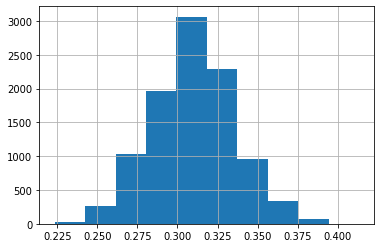

In [16]:
plt.grid(True)
plt.hist(averages);

In [17]:
# You have to choose whatever your confidence interval
# HOWEVER
# Medical industry I THINK wants 95%.


x = round(np.percentile(averages, 2.5), 2)
y = round(np.percentile(averages, 97.5), 2)

In [18]:
print(f"We can say with 95% confidence that the average percent of people who click the call to action button in the experiment group is between {x*100} and {y*100}.")


We can say with 95% confidence that the average percent of people who click the call to action button in the experiment group is between 26.0 and 36.0.


In [19]:
# Use Bootstrapping to determine how accurate your data is/will be.
diffs = []
for _ in range(10000):
    sample = control_group.sample(300, replace=False)
    sample_size = dict(sample.action.value_counts())
    diffs.append(sample_size['click'] / (sample_size['view'] + sample_size['click']))

In [20]:
diffs

[0.31333333333333335,
 0.31333333333333335,
 0.2633333333333333,
 0.3466666666666667,
 0.2733333333333333,
 0.2733333333333333,
 0.3566666666666667,
 0.2966666666666667,
 0.24666666666666667,
 0.2733333333333333,
 0.2733333333333333,
 0.30333333333333334,
 0.29,
 0.31,
 0.30333333333333334,
 0.24666666666666667,
 0.29333333333333333,
 0.29,
 0.2833333333333333,
 0.24666666666666667,
 0.27666666666666667,
 0.27,
 0.25333333333333335,
 0.27,
 0.30333333333333334,
 0.22333333333333333,
 0.32,
 0.25333333333333335,
 0.27666666666666667,
 0.31333333333333335,
 0.22333333333333333,
 0.27666666666666667,
 0.24,
 0.28,
 0.26666666666666666,
 0.28,
 0.26666666666666666,
 0.31,
 0.2966666666666667,
 0.26666666666666666,
 0.29333333333333333,
 0.27666666666666667,
 0.2733333333333333,
 0.27666666666666667,
 0.30666666666666664,
 0.28,
 0.2733333333333333,
 0.34,
 0.29333333333333333,
 0.2733333333333333,
 0.31,
 0.26666666666666666,
 0.27,
 0.30666666666666664,
 0.28,
 0.27,
 0.25333333333333335,

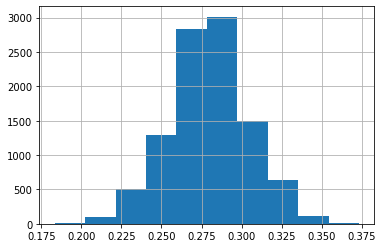

In [22]:
plt.grid(True)
plt.hist(diffs);

In [23]:
x = round(np.percentile(diffs, 2.5), 2)
y = round(np.percentile(diffs, 97.5), 2)

In [24]:
print(f"We can say with 95% confidence that the average percent of people who click the call to action button in the control group is between {x*100} and {y*100}.")

We can say with 95% confidence that the average percent of people who click the call to action button in the control group is between 23.0 and 33.0.
